In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/Data Mining/HW2/data/Dataset1.csv', delimiter=',')
data1 = np.array(data1[1:], dtype=np.float)

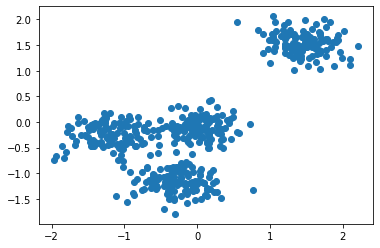

In [0]:
plt.scatter(data1[:,0],data1[:,1])
plt.show()

In [0]:
data2 = pd.read_csv('/content/drive/My Drive/Data Mining/HW2/data/Dataset2.csv', delimiter=',')
data2 = np.array(data2[1:], dtype=np.float)

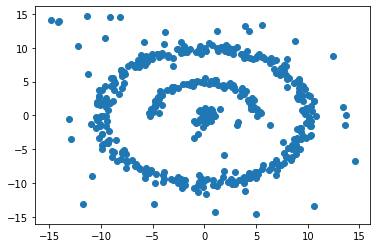

In [0]:
plt.scatter(data2[:,0],data2[:,1])
plt.show()

In [0]:

def centroid_init(data1, k):

    centroids = [] 
    random_point = np.random.randint(data1.shape[0])
    centroids.append(data1[random_point])

    for c_id in range(k - 1): 
        distance = [] 
        for i in range(data1.shape[0]): 
            point = data1[i] 
            d = sys.maxsize 
            for j in range(len(centroids)): 
                temp_dist = np.linalg.norm(point-centroids[j])
                d = min(d, temp_dist) 
            distance.append(d) 
        distance = np.array(distance) 
        next_centroid = data1[np.argmax(distance)]
        centroids.append(next_centroid) 
        distance = [] 
    return centroids 

In [0]:
init_centroids = np.array(centroid_init(data1, 4))
init_centroids[:,0]

array([-0.61236277,  1.81954651,  0.72533082, -1.63258055])

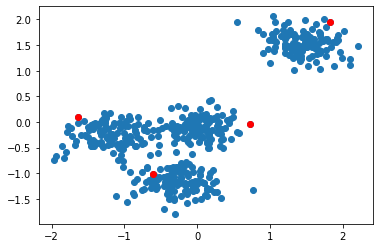

In [0]:
plt.scatter(data1[:,0], data1[:,1])
plt.scatter(init_centroids[:,0],init_centroids[:,1], color='red')
plt.show()


In [0]:
def find_nearest_centroid(data1, centroids):
    labels = []
    for data in data1:
        min_dist = sys.maxsize
        c_index = 0
        for c in range(centroids.shape[0]):
            dist = np.linalg.norm(data-centroids[c])
            if dist < min_dist:
                min_dist = dist
                c_index = c
        labels.append(c_index)
        
    return labels

In [0]:
def find_new_centroids(data1, labels, k, centroids):
    centroid_sum = np.zeros((k,2))
    count = np.zeros(k)
    change = True
    new_centroids = np.zeros((k,2))
    for i in range(data1.shape[0]):
        c_index = labels[i]
        centroid_sum[c_index] = np.add(centroid_sum[c_index], data1[i])
        count[c_index] +=1
    for i in range(k):
        new_centroids[i] = centroid_sum[i]/count[i]
    if np.array_equal(new_centroids, centroids):
        change = False
    
    return new_centroids, change


In [0]:
def kmeans(data1, k, iteration, convergence, plot, details):
    centroids = np.array(centroid_init(data1, k))
    labels = []
    if convergence == True:
        change = True
        if details:
            print("k-means will stop when convergence occure")
        counter = 0
        while change:
            if details:
                print("Iteration number: ", counter)
            labels = find_nearest_centroid(data1, centroids)
            centroids, change = find_new_centroids(data1, labels, k, centroids)
            counter += 1
    if convergence == False:
        if details:
            print("kmeans will stop after given iterations")
        for i in range(iteration):
            if details:
                print("Iteration number :", i)
            labels = find_nearest_centroid(my_data, centroids)
            centroids, _ = find_new_centroids(my_data, labels, k, centroids)
    if plot:
        
        plt.scatter(data1[:,0], data1[:,1], c=labels)
        plt.scatter(centroids[:,0],centroids[:,1], color='red')
        plt.show()
    
    cluster_error = np.zeros(k)
    cluster_counter = np.zeros(k)

    for i in range(data1.shape[0]):
        c_index = labels[i]
        dist = np.linalg.norm(data1[i]-centroids[c_index])
        cluster_error[c_index] = np.add(cluster_error[c_index], dist)
        cluster_counter[c_index] += 1
    
    cluster_error = np.divide(cluster_error, cluster_counter)
    
    if details:
        print("Cluster errors: ", cluster_error)
    CE = 0
    for ce in cluster_error:
        CE += ce
    CE /= k

    return CE

k-means will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
Iteration number:  6


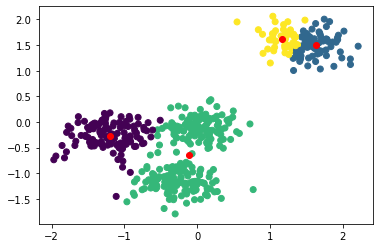

Cluster errors:  [0.33740166 0.25584071 0.61449976 0.2295376 ]


In [0]:
CE = kmeans(data1, 4, 15, convergence=True, plot=True, details=True)

In [0]:
def plot_error(k1, k2):
    error = np.zeros((k2+ 1 - k1, 2))
    print(error.shape)
    for i in range(k1, k2+ 1):
        error[i-k1] = np.array([i, kmeans(data1, i, 0, convergence=True, plot=False, details=False)])
    
    plt.plot(error[:,0], error[:,1])
    plt.show()

(15, 2)


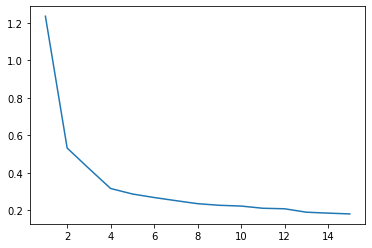

In [0]:
plot_error(1,15)

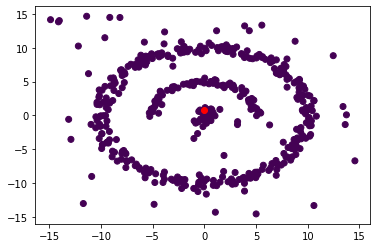

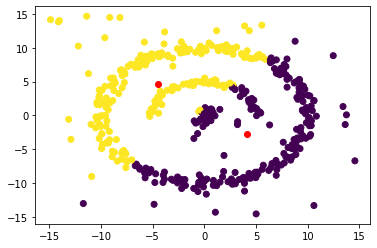

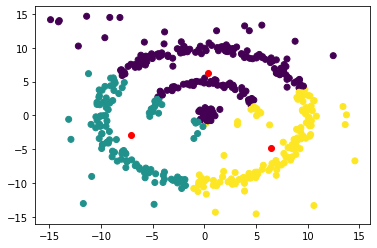

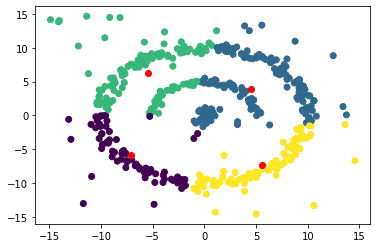

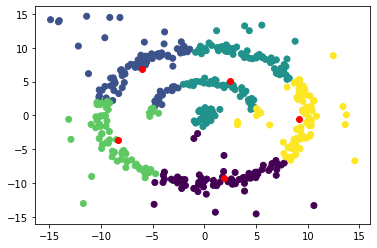

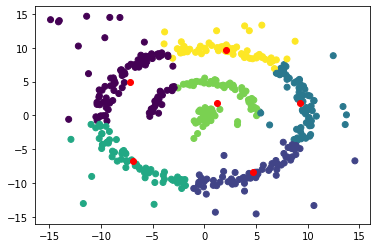

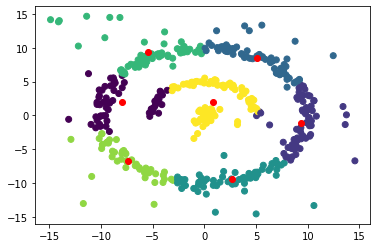

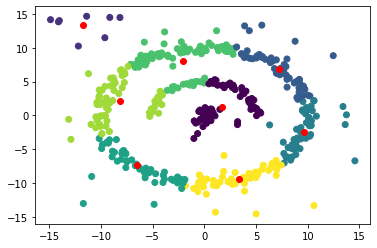

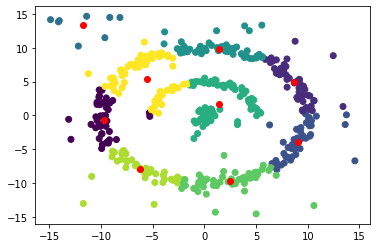

In [0]:
for i in range(1, 10):
    kmeans(data2, i, 0, convergence=True, plot=True, details=False)